## Prerequisite install

In [1]:
%%writefile install_mfa.sh
#!/bin/bash

## a script to install Montreal Forced Aligner (MFA)

root_dir=${1:-/tmp/mfa}
mkdir -p $root_dir
cd $root_dir

# download miniconda3
wget -q --show-progress https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
bash Miniconda3-latest-Linux-x86_64.sh -b -p $root_dir/miniconda3 -f

# create py38 env
$root_dir/miniconda3/bin/conda create -n aligner -c conda-forge openblas python=3.8 openfst pynini ngram baumwelch -y
source $root_dir/miniconda3/bin/activate aligner

# install mfa, download kaldi
pip install montreal-forced-aligner # install requirements
pip install git+https://github.com/MontrealCorpusTools/Montreal-Forced-Aligner.git # install latest updates

mfa thirdparty download

echo -e "\n======== DONE =========="
echo -e "\nTo activate MFA, run: source $root_dir/miniconda3/bin/activate aligner"
echo -e "\nTo delete MFA, run: rm -rf $root_dir"
echo -e "\nSee: https://montreal-forced-aligner.readthedocs.io/en/latest/aligning.html to know how to use MFA"

Writing install_mfa.sh


In [2]:
# download and install mfa
INSTALL_DIR="/tmp/mfa" # path to install directory

!bash ./install_mfa.sh {INSTALL_DIR}
# !source {INSTALL_DIR}/miniconda3/bin/activate aligner; mfa align --help

Miniconda3-latest-L 100%[===================>]  63.62M   253MB/s    in 0.3s    
PREFIX=/tmp/mfa/miniconda3
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /tmp/mfa/miniconda3

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py39h27cfd23_1003
    - ca-certificates==2021.7.5=h06a4308_1
    - certifi==2021.5.30=py39h06a4308_0
    - cffi==1.14.6=py39h400218f_0
    - chardet==4.0.0=py39h06a4308_1003
    - conda-package-handling==1.7.3=py39h27cfd23_1
    - conda==4.10.3=py39h06a4308_0
    - cryptography==3.4.7=py39hd23ed53_0
    - idna==2.10=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.2=he6710b0_1
    - openssl==1.1.1k=h27cfd23_0
    - pip==21.1.3=py39h06a4308_0
    - pycosat==0.6.3=py39h27cfd23_0
    - pycparser==2.

In [3]:
!sudo apt-get install praat

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libasound2-plugins libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common liborc-0.4-0 libpulsedsp libsnapd-glib1 libspeexdsp1
  libtdb1 libwebrtc-audio-processing1 osspd osspd-pulseaudio pulseaudio
  pulseaudio-utils rtkit
Suggested packages:
  gvfs snapd pavumeter pavucontrol paman paprefs ubuntu-sounds avahi-daemon
The following NEW packages will be installed:
  libasound2-plugins libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common liborc-0.4-0 libpulsedsp libsnapd-glib1 libspeexdsp1
  libtdb1 libwebrtc-audio-processing1 osspd osspd-pulseaudio praat pulseaudio
  pulseaudio-utils rtkit
0 upgraded, 18 newly installed, 0 to remove and 37 not upgraded.
Need to get 15.3 MB of archives.
After this operation, 65.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd

In [4]:
%load_ext rpy2.ipython

In [5]:
%%R
library(tidyverse)
library(magrittr)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: 
Attaching package: ‘magrittr’


R[write to console]: The following object is masked from ‘package:purrr’:

    set_names


R[write to console]: The following object is masked from ‘package:tidyr’:

    extract




In [6]:
!git clone https://github.com/slrlab-tech/cantonese-tone-passage.git

Cloning into 'cantonese-tone-passage'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 32 (delta 12), reused 14 (delta 5), pack-reused 0
Unpacking objects: 100% (32/32), done.


## MFA for Cantonese

In [ ]:
%cd cantonese-tone-passage
!source {INSTALL_DIR}/miniconda3/bin/activate aligner; \
mfa align input cantonese_pronunciation.dict cantonese_model.zip output -j4 -c
%cd ..

/content/cantonese-tone-passage
All required kaldi binaries were found!
/root/Documents/MFA/input/align.log
INFO - Setting up corpus information...
INFO - Number of speakers in corpus: 4, average number of utterances per speaker: 1.0
INFO - Parsing dictionary without pronunciation probabilities without silence probabilities
INFO - Creating dictionary information...
INFO - Setting up training data...
Generating base features (mfcc)...
Calculating CMVN...
INFO - Done with setup!
INFO - Performing first-pass alignment...
INFO - Calculating fMLLR for speaker adaptation...
INFO - Performing second-pass alignment...
INFO - All done!
/content


# Praat for obtaining F0

In [ ]:
!/usr/bin/praat --run cantonese-tone-passage/measuretones_colab.praat input/5100101M/5100101M.wav output/5100101M/5100101M.TextGrid 5100101M 75 500

input/5100101M/5100101M.wavoutput/5100101M/5100101M.TextGrid5100101M75500
1	gam1
2	tin1
3	si6
4	aa3
5	ji1
6	fong3
7	gaa3
9	jat6
10	zi2
11	so2
12	ji3
13	taa1
14	daai3
15	ngo5
16	wo4
17	biu2
18	ze2
19	biu2
20	mui2
21	heoi3
24	dei6
25	tit3
27	mun4
28	cin4
29	aa3
30	ji1
31	deoi3
32	ngo5
33	mun4
34	syut3
35	joeng6
36	ngo5
37	gou3
38	sou3
39	nei5
40	mun4
41	baa3
42	ze2
43	zoeng1
44	wui5
45	si6
46	jat1
47	ci3
49	fan1
50	naan4
51	mong4
53	leoi5
54	cing4
55	ngo5
56	mun4
57	gei2
58	go3
59	jan4
60	zaam6
61	zoi6
62	jyut6
63	toi4
64	soeng6
65	zau6
66	jyu4
67	soeng5
68	hok6
69	naa5
70	joeng6
71	dang2
72	doi6
73	dei6
74	tit3
75	loi4
76	lam4
78	si4
79	gwong2
80	bo3
81	hoeng2
82	hei2
83	wong5
84	hoi2
85	joeng4
86	sai3
87	gaai3
89	lit6
90	ce1
92	zoeng1
93	dou3
94	daat6
95	ngo5
97	biu2
98	ze2
99	laap6
100	haak1
101	deoi3
102	mong6
103	ngo5
104	bin6
106	sam6
107	mo1
108	si6
109	hoi2
110	joeng4
111	sai3
112	gaai3
113	ne1
114	jing1
115	goi1
116	si6
117	hoi2
118	joeng4
119	gung1
120	jyun2
121	baa6
122	dong1


# R for plotting contour

In [ ]:
%%R
data <- read_csv("/content/cantonese-tone-passage/5001102F.csv")
data %<>% mutate_if(is.double,as.character)
data

Rows: 302 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (29): wordLabel, vowelLabel, toneNumber, F0-0, F0-5, F0-10, F0-15, F0-20...
dbl  (3): token_number, toneStart, toneDuration

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 302 × 32
   token_number wordLabel vowelLabel toneNumber toneStart toneDuration `F0-0`   
   <chr>        <chr>     <chr>      <chr>      <chr>     <chr>        <chr>    
 1 1            gam1      a          T1         1.33      0.23         357.2833…
 2 2            tin1      i          T1         1.64      0.27         --undefi…
 3 3            si6       i          T6         2.11      0.14         --undefi…
 4 4            aa3       aa         T3         2.29      0.14         --undefi…
 5 5            ji1       i          T1         2.43      0.25         --undefi…
 6 6       

In [ ]:
%%R
data %<>%
    # Replace "T<>" with "unknown"
    mutate(prevTone = str_replace(prevTone,"T<>", "unknown"),
           nextTone = str_replace(nextTone, "T<>", "unknown")) %>%
    # Replace "^T$" (^ = start of string, $ = end of string) with "pause"
    mutate(prevTone = str_replace(prevTone, "^T$", "pause"),
           nextTone = str_replace(nextTone, "^T$", "pause"))
    
data %<>%
    filter(!is.na(prevTone))


##### Get F0 measurements ready for analyzing data #####
data %<>%
    # Gather all F0 measurements into a single column so we can manipulate them using the mutate command
    # This is going to make our data "longer" instead of "wider"
    # Every F0 measurement (every observation) will be on its own row
    pivot_longer(names_to = "Timepoint", values_to = "F0", starts_with("F0")) %>%
    # Get rid of undefined values
    filter(F0 != "--undefined--") %>%
    # Get rid of "F0-" in the Timepoint column and make numeric
    mutate(Timepoint = str_replace(Timepoint, "F0-", "")) %>%
    # Redfine columns as "numeric" instead of "character"
    mutate(F0 = as.numeric(F0),
           Timepoint = as.numeric(Timepoint))
    
# We'll exclude the first and last 15% of the toneNumber to avoid boundary effects
data %<>%
    filter(Timepoint > 10 & Timepoint < 90)

# Let's have a look!
# Plot raw toneNumber contours
# data %>%
#   ggplot(aes(x = Timepoint, y = F0, color = toneNumber, group = token_number)) + 
#   geom_line()

In [ ]:
%%R
# Get overall mean and median F0 for each speaker
data %<>%
    mutate(meanF0 = mean(F0),
              medianF0 = median(F0)) %>%
    right_join(data)

# data %<>%
#     left_join(semitoneNumber.references)

data %<>%
    mutate(F0.st = (12 * log(F0 / medianF0)) / log(2))

Joining, by = c("token_number", "wordLabel", "vowelLabel", "toneNumber", "toneStart", "toneDuration", "syllType", "onset", "coda", "prevTone", "nextTone", "Timepoint", "F0")


`summarise()` has grouped output by 'Timepoint'. You can override using the `.groups` argument.


R[write to console]: `geom_smooth()` using formula 'y ~ x'



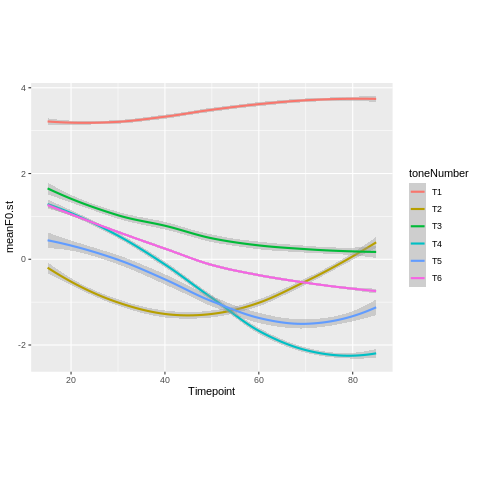

In [ ]:
%%R
####### Plot Normalized toneNumbers ######

# Plot overall toneNumber inventories for individual speakers
data %>%
    group_by(Timepoint, toneNumber) %>%
    summarise(meanF0.st = mean(F0.st)) %>% 
    ggplot(aes(x = Timepoint, y = meanF0.st, color = toneNumber, group = toneNumber)) + 
      geom_smooth(method="loess")+ theme(aspect.ratio = .8)